In [1]:
from sympy import*
from sympy.plotting import*
import numpy as np

def obtener_gradiente(f,v):
    n=len(v)
    g=[]
    for i in range(n):
        d=diff(f,v[i])
        g=g+[d]
    return g

def evaluar_gradiente(g,v,u):
    n=len(v)
    c=[]
    for i in range(n):
        t=g[i]
        for j in range(n):
            t=t.subs(v[j],u[j])
        c=c+[float(t)]
    return c

def magnitud_del_gradiente(c):
    norma=sqrt(np.dot(c,c))
    return norma

def gradiente_normalizado(c):
    norma=magnitud_del_gradiente(c)
    t=list(np.array(c)/norma)
    cn=[]
    for i in range(len(c)):
        cn=cn+[float(t[i])]
    return cn

def evaluar_solucion(f,v,u):
    fm=f.subs(v[0],u[0])
    for i in range(1,len(v)):
        fm=fm.subs(v[i],u[i])
    return fm

In [2]:
def calcular_paso(f,g,v,u):
    c=evaluar_gradiente(g,v,u)
    cn=gradiente_normalizado(c)
    t=Symbol('t')
    xt=[]
    for i in range(len(v)):
        xt=xt+[float(u[i])-t*float(cn[i])]
    fs=f.subs(v[0],xt[0])
    for i in range(1,len(v)):
        fs=fs.subs(v[i],xt[i])
    df=diff(fs,t)
    ddf=diff(df,t)
    s=1
    for i in range(5):
        s=s-float(df.subs(t,s))/float(ddf.subs(t,s))
    return s

def metodo_gradiente(f,v,u,e,m,imp=0):
    u0=u.copy()
    g=obtener_gradiente(f,v)
    for k in range(m):
        c=evaluar_gradiente(g,v,u0)
        norma=magnitud_del_gradiente(c)
        if norma<e:
            fm=evaluar_solucion(f,v,u0)
            return u0,fm
        s=calcular_paso(f,g,v,u0)
        cn=gradiente_normalizado(c)
        uk=[]
        for i in range(len(c)):
            uk=uk+[float(u0[i])-s*float(cn[i])]
        u0=uk.copy()
        if imp>0:
            print('k=',k+1,' s=',s,' vector=',u0)
    return [],None

## Ejemplo 1


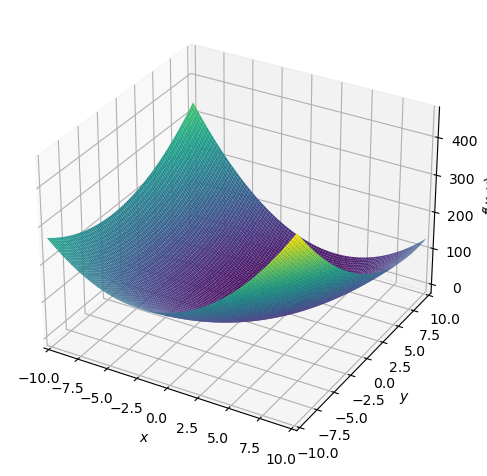

In [3]:
x,y=symbols('x,y')
f=2*x**2-x*y+y**2-7*y
plot3d(f,(x,-10,10),(y,-10,10),colormap='inferno')

In [4]:
v=[x,y]
u=[0,0]
uk,fm=metodo_gradiente(f,v,u,0.01,20,1)

k= 1  s= 3.5  vector= [0.0, 3.5]
k= 2  s= 0.875  vector= [0.875, 3.5]
k= 3  s= 0.4375  vector= [0.875, 3.9375]
k= 4  s= 0.109375  vector= [0.984375, 3.9375]
k= 5  s= 0.0546875  vector= [0.984375, 3.9921875]
k= 6  s= 0.013671875  vector= [0.998046875, 3.9921875]
k= 7  s= 0.0068359375  vector= [0.998046875, 3.9990234375]


## Ejemplo 2

In [5]:
x,y=symbols('x,y')
v=[x,y]
u=[5,5]
uk,fm=metodo_gradiente(f,v,u,0.01,20)
uk, fm

([1.001147654264687, 4.000286913566172], -13.9999976127376)

## Ejemplo 3

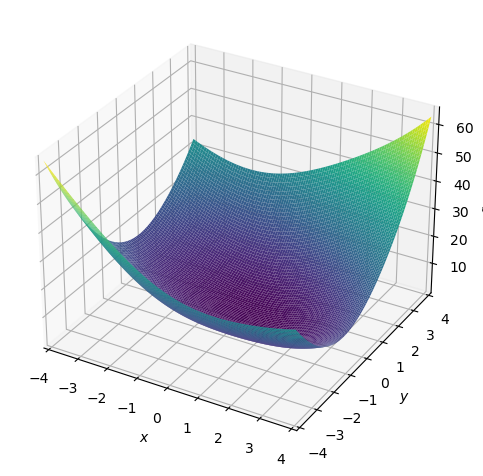

In [6]:
x,y=symbols('x,y')
f=x**2+2*y**2+cos(x+y+1)+x*y
plot3d(f,(x,-4,4),(y,-4,4))

In [7]:
v=[x,y]
u=[1,1]
uk,fm=metodo_gradiente(f,v,u,0.001,20)
uk ,fm 

([0.42864627450129655, 0.14293529459696494], 0.285082064827950)

## Ejemplo 4

In [8]:
x,y,z=symbols('x,y,z')
f=5*(x-1)**2+3*(y+2)**2+4*(z+3)**2+x*y*z+1
v=[x,y,z]
u=[0,0,0]
uk,fm=metodo_gradiente(f,v,u,0.01,20)
uk, fm 


([0.49092267710784043, -1.762849967729951, -2.8919840590397894],
 5.01397838490301)

## Ejemplo 5

In [9]:
x1,x2,x3,x4=symbols('x1,x2,x3,x4')
f=5*(x1-1)**2+3*(x2-2)**2+4*(x3+3)**2+(x4-1)**4-x1*x2*x3*x4+5
v=[x1,x2,x3,x4]
u=[0,0,0,0]
uk,fm=metodo_gradiente(f,v,u,0.01,20)
uk ,fm

([1.1570991258533814,
  2.141077839354268,
  -3.0738289454327443,
  -0.23935943405879354],
 5.74146881516544)

## Ejemplo 6

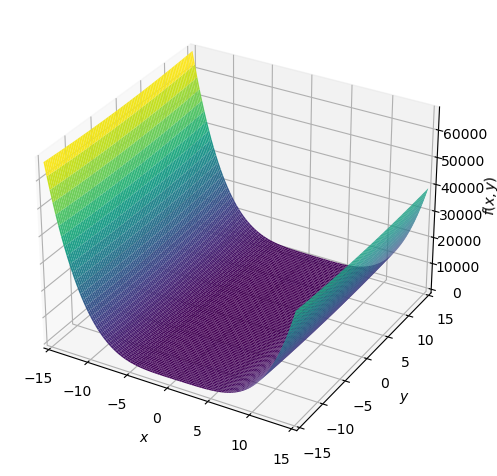

In [10]:
x,y=symbols('x,y')
f=(x-1)**4 + 5*(y-1)**2 -2*x*y
plot3d(f,(x,-15,15),(y,-15,15))

In [12]:
v=[x,y]
u=[1,1]
uk,fm=metodo_gradiente(f,v,u,0.001,200,1)
uk ,fm 

k= 1  s= 0.782871550586394  vector= [1.5535737822176663, 1.5535737822176663]
k= 2  s= 0.35096123499538245  vector= [1.8017408514165068, 1.305406713018826]
k= 3  s= 0.10741343464895724  vector= [1.8776936194473226, 1.3813594810496417]
k= 4  s= 0.007066862660359965  vector= [1.8826906459561752, 1.376362454540785]
k= 5  s= 0.00032365717199714014  vector= [1.882919506137274, 1.3765913147218838]


([1.882919506137274, 1.3765913147218838], -3.86722288724159)

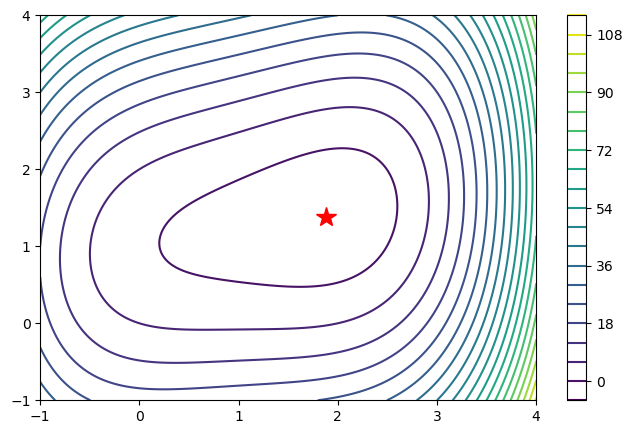

In [24]:
import matplotlib.pyplot as plt
X = np.linspace(-1, 4, 400)
Y = np.linspace(-1, 4, 400)
X, Y = np.meshgrid(X, Y)

Z = (X-1)**4 + 5*(Y-1)**2 - 2*X*Y

plt.figure(figsize=(8, 5))
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.plot(uk[0], uk[1], marker='*', color='red', markersize=15)
plt.colorbar()
plt.show()


# Métodos para obtener mínimos en `scipy.optimize`

## `fmin_ncg` (Newton-Conjugate Gradient)

**Tipo de método:** Basado en segunda derivada (Hessiano aproximado).

**Idea principal:**  
Combina el método de Newton con el método de gradiente conjugado para resolver el sistema lineal asociado al Hessiano sin calcularlo explícitamente.

**Características:**
- Utiliza información de **gradiente** y opcionalmente del **Hessiano**.
- Aproxima el paso de Newton resolviendo el sistema:
  \[
  H_k p_k = -\nabla f(x_k)
  \]
  usando gradiente conjugado.
- Eficiente para problemas de gran escala donde el Hessiano es costoso de calcular.

**Ventajas:**
- Buena eficiencia en problemas grandes.
- Aprovecha información de curvatura (mejor que métodos de solo gradiente).

**Desventajas:**
- Requiere gradiente.
- Puede ser inestable si el Hessiano no es definido positivo o la función es muy no convexa.

**Uso típico:**
- Optimización de funciones suaves y diferenciables.
- Problemas en machine learning y estadística.

---

## `fmin_bfgs` (BFGS)

**Tipo de método:** Cuasi-Newton (aproxima el Hessiano).

**Idea principal:**  
Actualiza iterativamente una aproximación del Hessiano usando solo evaluaciones de gradiente.

**Características:**
- Usa el esquema de actualización BFGS del Hessiano aproximado.
- Pertenece a la familia de métodos **Quasi-Newton**.
- Muy robusto y ampliamente utilizado en optimización sin restricciones.

**Ventajas:**
- No requiere calcular el Hessiano explícito.
- Generalmente converge rápido.
- Estable en la práctica.

**Desventajas:**
- Requiere gradiente.
- Puede fallar en funciones altamente no convexas.

**Uso típico:**
- Ajuste de modelos estadísticos.
- Optimización en aprendizaje automático.
- Problemas continuos sin restricciones.

---

## `fmin_cg` (Conjugate Gradient)

**Tipo de método:** Basado en gradiente (primer orden).

**Idea principal:**  
Mejora sobre el descenso de gradiente estándar al construir direcciones conjugadas que aceleran la convergencia.

**Características:**
- No usa Hessiano.
- Requiere gradiente.
- Genera direcciones de búsqueda conjugadas entre sí.
- Reduce el zig-zag típico del descenso de gradiente.

**Ventajas:**
- Más eficiente que el descenso de gradiente clásico.
- No requiere almacenar matrices grandes (útil en alta dimensión).

**Desventajas:**
- Más lento que métodos cuasi-Newton como BFGS.
- Sensible a ruido en el gradiente.

**Uso típico:**
- Problemas de alta dimensión.
- Casos donde calcular o aproximar el Hessiano es costoso.

---

## `optimize.brute` (Búsqueda por fuerza bruta)

**Tipo de método:** Búsqueda exhaustiva (global).

**Idea principal:**  
Evalúa la función objetivo en una **rejilla (grid)** sobre el espacio de búsqueda y selecciona el mejor punto encontrado.

**Características:**
- No usa gradiente ni Hessiano.
- Explora sistemáticamente el espacio de búsqueda.
- Puede encontrar mínimos globales si la rejilla es suficientemente fina.

**Ventajas:**
- No requiere que la función sea diferenciable.
- Puede evitar mínimos locales.
- Fácil de implementar.

**Desventajas:**
- Muy costoso computacionalmente en alta dimensión.
- Poco práctico para más de 3–5 dimensiones con rejillas finas.

**Uso típico:**
- Problemas de baja dimensión.
- Funciones ruidosas o no suaves.
- Búsqueda inicial antes de métodos locales.

---



In [27]:
def f(X):
    x, y = X
    return (4 * np.sin(np.pi * x) + 6 * np.sin(np.pi * y)) + (x - 1)**2 + (y - 1)**2

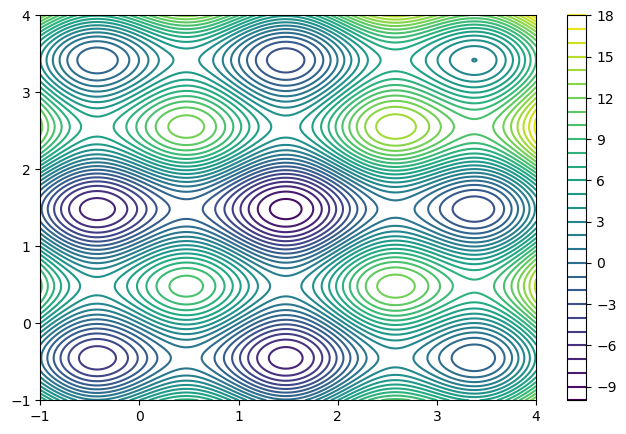

In [29]:
X = np.linspace(-1, 4, 400)
Y = np.linspace(-1, 4, 400)
X, Y = np.meshgrid(X, Y)


plt.figure(figsize=(8, 5))
plt.contour(X, Y, f([X, Y]), levels=30, cmap='viridis')
plt.colorbar()
plt.show()

In [36]:
from scipy import optimize
print(optimize.brute)

<function brute at 0x7bb5c5097ba0>


In [46]:
x_start = optimize.brute(f, (slice(-3, 5, 0.5), slice(-3, 5, 0.5)), finish=None)
print(x_start)
f(x_start)

[1.5 1.5]


-9.5

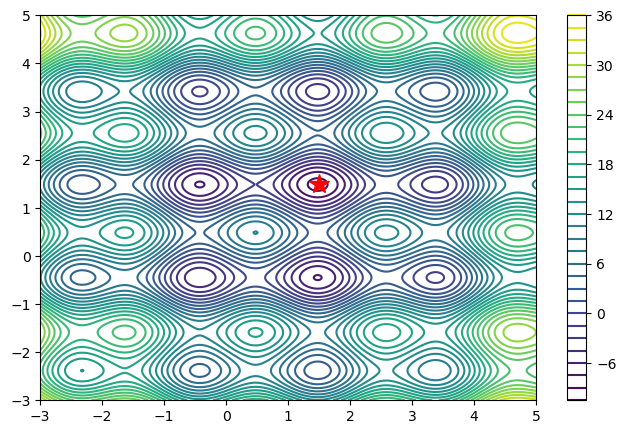

In [53]:
X = np.linspace(-3, 5, 400)
Y = np.linspace(-3, 5, 400)
X, Y = np.meshgrid(X, Y)


plt.figure(figsize=(8, 5))
plt.contour(X, Y, f([X, Y]), levels=30, cmap='viridis')
plt.plot(x_start[0], x_start[1], marker='*', color='red', markersize=15)
plt.colorbar()
plt.show()